<a href="https://colab.research.google.com/github/profandersonvanin01/machine_learning/blob/main/03_Perceptron_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://douglasrizzo.com.br/iris-keras/


# **Classificação da base de dados Iris utilizando um perceptron multi-camadas em Keras** 

Este notebook exemplifica o treinamento de uma perceptron multi-camadas na classificação da base de dados Iris. O notebook utiliza o pacote scikit-learn para carregamento e separação da base de dados em treinamento e teste, o pacote keras para criação e treinamento da rede neural e o matplotlib para a geração de gráficos.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# **Sobre a Base de Dados Iris** 

A base de dados Iris contém 4 medidas de 150 flores individuais de 3 espécies distintas (50 flores de cada espécie). Ela foi criada em 1936 por Ronald Fisher [link](https://pt.wikipedia.org/wiki/Conjunto_de_dados_flor_Iris).

As medidas são a altura e larguras das pétalas e sépalas de cada flor e as espécies de flores são iris setosa, iris versicolor e iris virginica, apresentadas nas imagens abaixo.

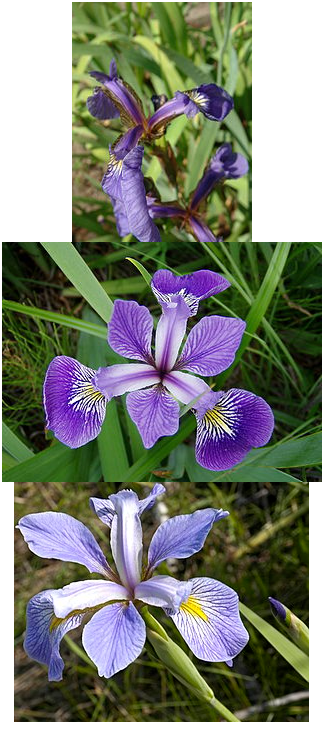

# **Visualizando a Iris** 

Apenas momentaneamente, utilizaremos o pacote seaborn para exibir as características das flores e suas espécies em um gráfico. Os pontos significam flores individuais, as cores simbolizam as espécies às quais cada flor pertence e linhas/colunas exibem pares de características plotados uns contra os outros.

In [ ]:
import seaborn as sns

iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species")

Para a tarefa de classificação, a rede neural deve conseguir diferenciar entre as 3 espécies de flores, dadas suas medidas. É possível perceber visualmente que esta é uma tarefa fácil.

Por exemplo, todas as flores da espécie iris setosa (em azul) possuem altura e largura de pétala (petal_length e petal_width) menores do que qualquer flor de qualquer outra espécie. Uma rede neural que conseguisse aprender que toda flor da espécie iris setosa possui petal_length < 2 ou petal_width < 0.8 conseguiria classificar esta classe com 100% de precisão.

Tudo o que uma rede neural faz durante o aprendizado é descobrir pontos de separação entre as classes, como o exemplificado acima, utilizando características (ou combinações de características) presentes na base de dados.

# **Preparando os dados** 

Usaremos o pacote scikit-learn para carregar a base de dados e visualizar suas informações. As medidas das flores e suas respectivas classes são carregadas em variáveis distintas.

Repare que a base possui 150 flores, que as classes são representadas pelos números inteiros 0, 1 e 2 e as características das flores são armazenadas em uma única matriz de 150 linhas (as flores) por 4 colunas (as medidas).

In [ ]:
iris_X, iris_y = load_iris(return_X_y=True)

print('Qtd. itens no conj. de treinamento:', len(iris_X))
print('Classes:', iris_y)

print('\nExemplos de medida de 5 flores:')
print(iris_X[:5])

Vamos separar nossa base de dados em conjuntos de treinamento e de teste. O conjunto de treinamento será utilizado para treinar o modelo criado e o conjunto de testes, utilizado na avaliação do modelo após o treinamento.

O desempenho da rede neural no conjunto de treinamento é um indicativo da capacidade de aprendizado do modelo, enquanto o desempenho no conjunto de testes indica a capacidade de generalização da rede, ou seja, sua capacidade de classificar novos dados (nunca antes vistos) corretamente.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_X,
                                                    iris_y,
                                                    test_size = 0.2,
                                                    random_state=123)

print('Qtd. itens no conj. de treinamento:', len(y_train))
print('Qtd. itens no conj. de teste:', len(y_test))

# **One-hot encoding** 

A forma como as classes são representadas atualmente (0, 1 e 2) não é a melhor para que a rede aprenda a tarefa de classificação. Isso porque, caso a rede tenha apenas uma saída (um número entre 0 e 2), ao aprender a realizar a saída 2, a rede pode aos poucos “desaprender” a saída 0, por serem valores de classes opostos.

Uma forma de mitigar este problema é fazer com que o aprendizado de cada classe seja independente do aprendizado de todas as outras. Se a rede tiver 3 saídas e aprendar a maximizar o valor de uma saída independente das outras, podemos escolher o maior valor dos três como a classificação correta.

Para isso, modificaremos a representação de nossas classes utilizando utilizando one-hot encoding, uma espécie de categorização de dados que torna o aprendizado de classe linearmente independente para a rede neural.

Perceba como os números 0, 1 e 2 se tornam as sequências 100, 010 e 001, respectivamente.

In [ ]:
y_train_onehot = keras.utils.to_categorical(y_train, num_classes = 3)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes = 3)

# imprime os 5 primeiros valores para exemplificar
print("### Antes ###")
print(y_train[:5])
print(y_test[:5])

print("\n### Depois ###")
print(y_train_onehot[:5])
print(y_test_onehot[:5])

# **Declarando a topologia da rede neural** 

Neste notebook, uma rede neural será utilizada para descobrir a qual das 3 espécies cada flor pertence, dadas suas 4 medidas. Em outras palavras, a rede neural será um classificador treinado para prever em qual classe (de 3) um vetor de 4 valores pertence.

Vamos construir uma rede neural utilizando Keras. Aqui, configuramos camadas, neurônios por camada, funções de ativação, otimizador e função de erro.

Após construir a rede neural, utilizamos uma função utilitária do Keras para exibir a topologia do modelo. Neste caso, a rede receberá como entrada vetores de tamanho 4 (correspondente à quantidade de medidas de nossas pétalas e utilizará 4 camadas densas para realizar a classificação.

Repare que o tamanho da entrada de uma camada equivale ao tamanho da saída da camada anterior, permitindo que camadas sejam encadeadas para aumentar a expressividade da rede.

A última camada da rede tem como saída vetores de tamanho 3, correspondentes à quantidade de espécies de flores que desejamos classificar.

Vamos criar uma função para conseguir recriar o mesmo modelo no futuro.

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(10, activation='tanh', input_dim=4))
  model.add(Dense(8,activation='tanh'))
  model.add(Dense(6,activation='tanh'))
  model.add(Dense(3,activation='softmax'))
  model.compile('adam','categorical_crossentropy', metrics=['categorical_accuracy'])

  return model

model=create_model()

keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=True,
    dpi=96
)

Como uma biblioteca de redes neurais de alto nível, o Keras abstrai algumas complexidades da configuração do método de treinamento. Existem diferentes opções de otimizadores e funções de erro que podem ser utilizadas com a biblioteca, que podem ter diferentes efeitos no tempo de treinamento da rede. Opções comuns de otimizadores incluem sgd , rmsprop e adam . Já a função de erro categorical_crossentropy é a mais apropriada para tarefas de classificação multi-classes, quando as classes são representadas em one-hot encoding.

# **Treinando a rede** 

Vamos treinar nossa rede neural. Ela aprenderá a realizar a classificação dos dados de treinamento ( X_train ) para as classes categorizadas ( y_train_onehot ) por um número de épocas pré-determinado.

Durante o treinamento, o Keras armazena os valores da função de erro e outras medidas e permite acessá-los em uma variável, aqui chamada history .

É possível executar a célula abaixo repetidas vezes para que a mesma rede seja treinada por mais épocas.

Também é possível separar uma parcela do conjunto de treinamento para validação, a avaliação em tempo real da rede neural em um conjunto de dados que não é utilizado para treinamento.

In [ ]:
history = model.fit(X_train, y_train_onehot, validation_split=.1, epochs=500, verbose=2)

Vamos criar um gráfico com o erro e a acurácia da rede ao longo das épocas de treinamento. Caso uma parcela do conjunto de treinamento tenha sido utilizada para validação, novas linhas no gráfico exibirão o desempenho da rede neste conjunto separado de dados.

In [ ]:
def plot_metrics(history):
  fig, axes = plt.subplots(2,1, True,figsize=(8,12))

  #  "Accuracy"
  axes[0].plot(history.history['categorical_accuracy'])
  axes[0].set_title('Acurácia')
  # "Loss"
  axes[1].plot(history.history['loss'])
  axes[1].set_title('Erro')

  if 'val_loss' in history.history.keys():
    axes[0].plot(history.history['val_categorical_accuracy'])
    axes[1].plot(history.history['val_loss'])
    axes[0].legend(['Treino', 'Validação'])
    axes[1].legend(['Treino', 'Validação'])

  plt.xlabel('Épocas')

  plt.show()

plot_metrics(history)

# **Overfitting** 

O treino da rede neural por muitas épocas no conjunto de treinamento pode fazer com que o modelo se especialize neste conjunto de dados, um fenômeno chamado overfitting.

Essa especialização prejudica o desempenho da rede neural, uma vez que, ao se especializar, ela falha em generalizar sua capacidade de classificação para dados não observados.

O overfitting pode ser visualizado quando o erro de classificação no conjunto de treinamento continua a diminuir, ao mesmo tempo em que o erro no conjunto de validação começa a aumentar. Este ponto pode ser considerado um bom momento para encerrar o treinamento da rede neural.

Quando uma rede neural possui pesos demais para a tarefa que irá realizar, ela pode sofrer de overfitting se treinada por muitas épocas, ajustando-se demais aos dados de treinamento.

Algumas formas de evitar o overfitting incluem:

- utilizar uma rede neural menor;
- utilizar regularização (que não será abordada aqui);
- parar o treinamento antes que o overfitting ocorra.

Considerando as observações no primeiro treinamento da rede neural, vamos treiná-la novamente, dessa vez encerrando o treinamento mais cedo e evitando o overfitting. Adicionalmente, vamos utilizar o conjunto de treinamento em sua totalidade nesta rodada de treinamento, sem validação.

In [ ]:
model = create_model()
history = model.fit(X_train, y_train_onehot, epochs=150, verbose=0)
plot_metrics(history)

# **Realizando inferências com o modelo treinado** 

Vamos utilizar a rede treinada para classificar os dados de teste que separamos no início e visualizar as classes preditas pelo modelo. A rede neural classifica todo o conjunto de testes de uma vez.

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

A saída da rede é um conjunto de 3 valores para cada vetor de entrada. Cada um dos 3 valores indica a relevância da respectiva classe para o vetor de entrada. Quanto maior essa relevância, maiores as chances do dado de entrada pertencer àquela classe.

A função de ativação na última camada da rede neural dita a natureza dos valores de saída:

- tanh : tangente hiperbólica (intervalo ).
- sigmoid : sigmoide (intervalo ).
- softmax : softmax (intervalo , a soma dos valores preditos para cada dado de entrada deve ser igual a 1).

Para transformar os valores exibidos acima nas classes preditas, escolhemos a maior saída no eixo das classes.

Compare os valores verdadeiros com os valores preditos pela rede.

In [ ]:
y_pred_onehot = y_pred.argmax(axis=1)
print('Classes reais:\t\t', y_test)
print('Classes preditas:\t', y_pred_onehot)

# **Avaliando a rede treinada** 

Utilizamos o scikit-learn para produzir relatórios de classificação utilizando os valores reais e os preditos.

As medidas de desempenho da rede são precisão, recall (revocação) e F1 [link](https://pt.wikipedia.org/wiki/Precis%C3%A3o_e_revoca%C3%A7%C3%A3o#Defini%C3%A7%C3%A3o_(contexto_de_classifica%C3%A7%C3%A3o)).

A precisão indica a quantidade de classificações positivas que a rede realizou que são realmente positivas. A revocação indica a fração de classificações positivas que a rede realizou, do total de classificações positivas.

Em nosso contexto, podemos imaginar que essas medidas respondem às seguintes perguntas:

- Precisão: De todas as flores que meu classificador indicou como sendo da classe iris setosa, quais realmente são dessa classe?

- Revocação: De todas as flores da espécie iris setosa presentes na minha base de dados, quantas o meu classificador conseguiu identificar?

In [ ]:
print(classification_report(y_test, y_pred_onehot))

# **Detalhando precisão e revocação** 

A precisão e a revocação são valores relevantes sobre um modelo, porém suas definições podem ser um pouco confusas. Uma forma um pouco mais informativa de se pensar nestas medidas é utilizando-as na análise da eficácia de um teste médico hipotético (que toma o lugar de nosso modelo classificador) para uma doença e quais questões cada uma das medidas responde:

- Precisão: De todos os testes positivos realizados, quantos pacientes realmente possuem a doença?

- Revocação: De todos os pacientes que realmente possuem a doença, qual a porcentagem que eu consegui identificar utilizando meu teste?

Caso o teste médico possua alta precisão, temos certeza que todos os pacientes que informarmos como portadores da doença, certamente terão a doença. Ou seja, o teste não estará errado nas classificações positivas que realiza.

Caso o teste possua alta revocação, temos certeza que todos os portadores da doença em nossa população foram identificados.

Porém, algumas situações anômalas podem surgir. Por exemplo, se há 1000 doentes em nossa amostra e nosso classificador realiza apenas 1 classificação positiva e o paciente está realmente doente, a precisão do modelo é de 100%, pois não fez nenhuma classificação positiva errada.

Igualmente, se há 1000 doentes numa população de 1 milhão de pessoas e nosso classificador realiza 1 milhão de classificações positivas, ele possuirá uma revocação de 100%, uma vez que detectou todos os doentes.

Devido a estas anomalias, é sempre preciso ponderar qual medida é mais importante para um classificador em uma determinada tarefa ou, na melhor das hipóteses, treinar um classificador que maximize ambas as medidas.

A medida F-score (ou F-measure ou F1), também exibida acima, é uma combinação da precisão e da revocação e pode auxiliar na avaliação do classificador.

# **Matriz de confusão** 

A matriz de confusão compara, em números absolutos, as classes reais e preditas. Valores na diagonal principal indicam classificações corretas e qualquer outro valor indica erros de classificação no conjunto de testes.

In [ ]:
print(confusion_matrix(y_test, y_pred_onehot))

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_onehot)

In [ ]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Matrix de Confusão Seaborn com rótulos\n\n');
ax.set_xlabel('\nValores Previstos')
ax.set_ylabel('Valores Reais ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Setosa','Versicolor', 'Virginia'])
ax.yaxis.set_ticklabels(['Setosa','Versicolor', 'Virginia'])

## Display the visualization of the Confusion Matrix.
plt.show()

# **Conclusão** 

Este colab apresentou um exemplo clássico e básico de classificação de uma base de dados utilizando redes neurais. Os seguintes conceitos foram apresentados ao longo do colab:

1. apresentação da base de dados Iris, uma base muito famosa na área de estatística e aprendizado de máquina;
2. separação da base de dados entre conjuntos de treinamento, validação e testes;
3. criação de uma rede neural do tipo perceptron multi-camadas utilizando Keras;
treinamento da rede neural no conjunto de treinamento;
4. observação e descrição do fenômeno de overfitting no conjunto de validação;
5. re-treinamento da rede neural de forma a prevenir o overfitting;
6. realização de inferenças em dados nunca obervados antes pela rede neural (o conjunto de testes);
7. avaliação da rede neural utilizando precisão, revocação, F1-score e a matriz de confusão.